In [1]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

train_path = r'C:\Users\88018\Desktop\hw_1\CVPR\CIFAR-10-images-master\test'
test_path = r'C:\Users\88018\Desktop\hw_1\CVPR\CIFAR-10-images-master\train'

X_train = []
y_train = []
X_test = []
y_test = []

categories = os.listdir(train_path)
print('Categories:',categories)


category_count = 0
for category in categories:
    category_count += 1
    print('Reading category:',category_count)
    train_category_path = os.path.join(train_path,category)
    test_category_path = os.path.join(test_path,category)
    train_images = os.listdir(train_category_path)
    test_images = os.listdir(test_category_path)
    #print(images)
    
    # Reading Train_Data
    for image in train_images:
        X_train.append(cv2.imread(os.path.join(train_category_path,image)))
        y_train.append(category)
        
    # Reading Test_Data
    for image in test_images:
        X_test.append(cv2.imread(os.path.join(test_category_path,image)))
        y_test.append(category)
        
print('Complete')

Categories: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Reading category: 1
Reading category: 2
Reading category: 3
Reading category: 4
Reading category: 5
Reading category: 6
Reading category: 7
Reading category: 8
Reading category: 9
Reading category: 10
Complete


In [2]:
distances = []
completed = 0

#Calculating distance

for test_image in X_test[:20]:
    manhattan_dist = []
    for train_image in X_train:
        manhattan_dist.append(np.sum(abs(test_image.flatten()-train_image.flatten())))
    distances.append(manhattan_dist)
    completed += 1
    if completed%1000 == 0:
        print(f'Completed: {int(completed/100)}%')
        
print('Successful')

Successful


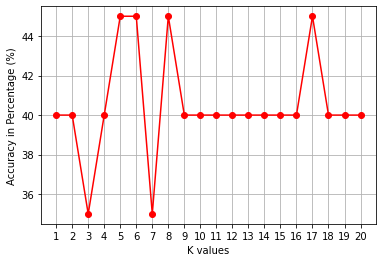

In [3]:
accuracies = []
k_values = range(1,21)

for k in k_values:  
    correct = 0
    wrong = 0
    for i,distance in enumerate(distances):
        sorted_dist = np.argsort(distance)
        predictions = []
        for dist in sorted_dist[:k]:
            predictions.append(y_train[dist])
        predicted = max(predictions, key=predictions.count)
        if predicted == y_test[i]:
            correct += 1
        else:
            wrong += 1
            
    accuracy = (correct/len(distances))*100
    accuracies.append(accuracy) #Accuracy%'
    
plt.figure()
plt.plot(k_values,accuracies,'ro-')
plt.xlabel('K values')
plt.ylabel('Accuracy in Percentage (%)')
plt.xticks(k_values)
plt.grid(True)
plt.show()
    